In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("instagrampost-translate.csv")
df

,Unnamed: 0,Steming,Text_Inggris
0,0,ugm metaverse minecraft challenge hai sobat mi...,ugm metaverse minecraft challenge hi friends m...
1,1,looking at the challenge or trouble not sure l...,looking at the challenge or trouble not sure l...
2,2,hello sobat online kenal fatmawati universitas...,"hello online friends, get to know fatmawati, m..."
3,3,msib mari ajar holaaa everyone tesalonika univ...,msib let's teach holaaa everyone Thessalonika ...
4,4,halo generasi muda indonesia kenal himmatuz za...,"hello, young generation of Indonesia, you know..."
...,...,...,...
176,176,terima kasih sempat program studi independent ...,thank you for taking the opportunity to study ...
177,177,agustus kemerdakaan nkri identik riah raya mer...,August the independence of the Republic of Ind...
178,178,hai magangers bingung studi independen galau p...,"Hi interns, confused about independent study, ..."
179,179,mt school parsial agenda upgrading trainer lea...,mt school partial upgrading agenda trainer lea...


In [3]:
df = df.drop(labels="Unnamed: 0", axis=1)

In [4]:
df.columns

Index(['Steming', 'Text_Inggris'], dtype='object')

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Laurence
[nltk_data]     Nicholas S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sentiment = SentimentIntensityAnalyzer()
df["Compound"] = [sentiment.polarity_scores(i)["compound"] for i in df["Text_Inggris"]]
df.head()

,Steming,Text_Inggris,Compound
0,ugm metaverse minecraft challenge hai sobat mi...,ugm metaverse minecraft challenge hi friends m...,0.9628
1,looking at the challenge or trouble not sure l...,looking at the challenge or trouble not sure l...,-0.2173
2,hello sobat online kenal fatmawati universitas...,"hello online friends, get to know fatmawati, m...",0.9062
3,msib mari ajar holaaa everyone tesalonika univ...,msib let's teach holaaa everyone Thessalonika ...,0.9824
4,halo generasi muda indonesia kenal himmatuz za...,"hello, young generation of Indonesia, you know...",0.9045


In [7]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("Positif")
    elif i <= -0.05:
        sentiment.append("Negatif")
    else:
        sentiment.append("Netral")
df["Label"] = sentiment
df.head(20)

,Steming,Text_Inggris,Compound,Label
0,ugm metaverse minecraft challenge hai sobat mi...,ugm metaverse minecraft challenge hi friends m...,0.9628,Positif
1,looking at the challenge or trouble not sure l...,looking at the challenge or trouble not sure l...,-0.2173,Negatif
2,hello sobat online kenal fatmawati universitas...,"hello online friends, get to know fatmawati, m...",0.9062,Positif
3,msib mari ajar holaaa everyone tesalonika univ...,msib let's teach holaaa everyone Thessalonika ...,0.9824,Positif
4,halo generasi muda indonesia kenal himmatuz za...,"hello, young generation of Indonesia, you know...",0.9045,Positif
5,halo intan putri sofyani mahasiswi program stu...,"Hello, Intan Putri Sofyani, student of the mat...",0.9413,Positif
6,kampus merdeka merdeka mandiri ajar,independent independent teaching campus,0.0000,Netral
7,halo faradia nur karimah mahasiswi jurus siste...,"hello Faradia Nur Karimah, student majoring in...",0.8694,Positif
8,assalamualaikum halo tarisa asri rahmayanti di...,"assalamualaikum, hello Tarisa Asri Rahmayanti,...",0.9835,Positif
9,hai guyss kenal savira yuliani mahasiswi progr...,"hi guys, you know Savira Yuliani, a student in...",0.9509,Positif


In [8]:
df[['Steming','Label']]

,Steming,Label
0,ugm metaverse minecraft challenge hai sobat mi...,Positif
1,looking at the challenge or trouble not sure l...,Negatif
2,hello sobat online kenal fatmawati universitas...,Positif
3,msib mari ajar holaaa everyone tesalonika univ...,Positif
4,halo generasi muda indonesia kenal himmatuz za...,Positif
...,...,...
176,terima kasih sempat program studi independent ...,Positif
177,agustus kemerdakaan nkri identik riah raya mer...,Positif
178,hai magangers bingung studi independen galau p...,Positif
179,mt school parsial agenda upgrading trainer lea...,Positif


In [9]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_19240\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Positif    165
Netral      12
Negatif      4
Name: count, dtype: int64

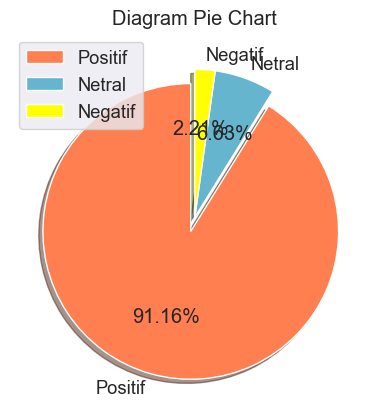

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#pie chart
labels = ['Positif','Netral','Negatif']
Category2 = [165,12,4]
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [11]:
keep_col = ['Steming','Label']
new_df = df[keep_col]
new_df.to_csv("instagrampost-labeling.csv")